#### Business Understanding

Business Problem: Bangaimana cara meningkatkan revenue dengan memprediksi status pengiriman yang akurat dari perusahaan e-commerce?

Objective: Build a model klasifikasi untuk memprediksi status pengiriman.

#### Data Cleansing

In [6]:
import pandas as pd

In [11]:
df = pd.read_csv("delivery_estimation.csv")

In [15]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [17]:
df = df.rename(columns = {"Reached.on.Time_Y.N": "on_time"})
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  on_time              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [21]:
## Check missing values

In [23]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
on_time                0
dtype: int64

In [29]:
## check outliers

In [31]:
df_num = df.select_dtypes(["int64"])
col_num = df_num.columns
col_num

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'on_time'],
      dtype='object')

In [35]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for ID
(0, 12)
Running for Customer_care_calls
(0, 12)
Running for Customer_rating
(0, 12)
Running for Cost_of_the_Product
(0, 12)
Running for Prior_purchases
(1003, 12)
Running for Discount_offered
(2209, 12)
Running for Weight_in_gms
(0, 12)
Running for on_time
(0, 12)


In [37]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]

Running for ID
Running for Customer_care_calls
Running for Customer_rating
Running for Cost_of_the_Product
Running for Prior_purchases
Running for Discount_offered
Running for Weight_in_gms
Running for on_time


In [39]:
df.shape

(7971, 12)

In [41]:
## Check duplicated

In [43]:
df.duplicated().sum()

0

#### EDA

In [46]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7971 entries, 3 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   7971 non-null   int64 
 1   Warehouse_block      7971 non-null   object
 2   Mode_of_Shipment     7971 non-null   object
 3   Customer_care_calls  7971 non-null   int64 
 4   Customer_rating      7971 non-null   int64 
 5   Cost_of_the_Product  7971 non-null   int64 
 6   Prior_purchases      7971 non-null   int64 
 7   Product_importance   7971 non-null   object
 8   Gender               7971 non-null   object
 9   Discount_offered     7971 non-null   int64 
 10  Weight_in_gms        7971 non-null   int64 
 11  on_time              7971 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 809.6+ KB


In [50]:
## Univariate Analysis

In [52]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,on_time
count,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000
mean,6460.916949,4.132982,2.993602,213.686238,3.282148,5.986953,3956.695772,0.495170
std,2750.646370,1.177638,1.413356,48.231331,0.991333,3.547644,1619.385342,0.500008
min,4.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,4380.500000,3.000000,2.000000,173.000000,3.000000,3.000000,1955.500000,0.000000
50%,6561.000000,4.000000,3.000000,220.000000,3.000000,6.000000,4520.000000,0.000000
75%,8782.500000,5.000000,4.000000,254.000000,4.000000,8.000000,5244.000000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,5.000000,19.000000,6102.000000,1.000000


In [56]:
col_num = col_num.tolist()

In [58]:
col_num

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'on_time']

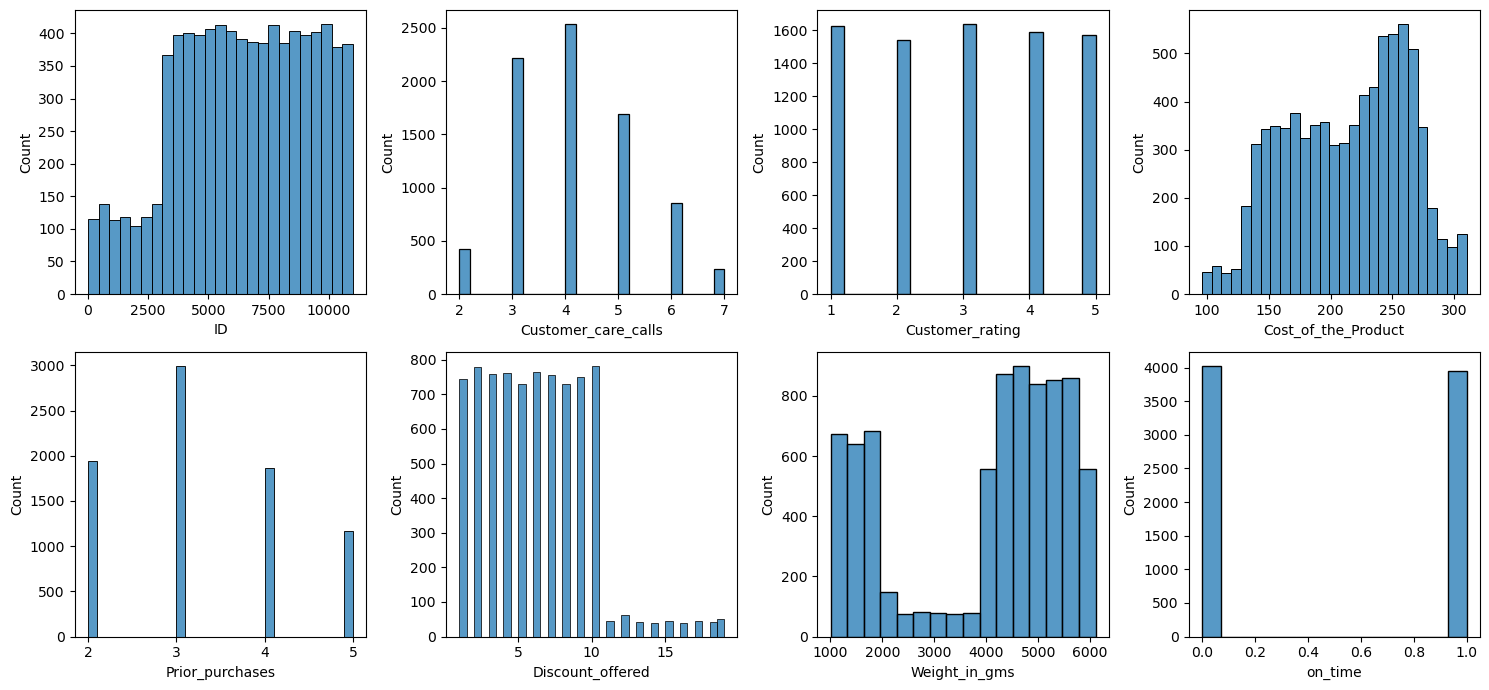

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,7))
for i in range(len(col_num)):
    plt.subplot(2,4,i+1)
    sns.histplot(x = col_num [i], data = df)
    plt.tight_layout()

In [66]:
## Multivariate Analysis

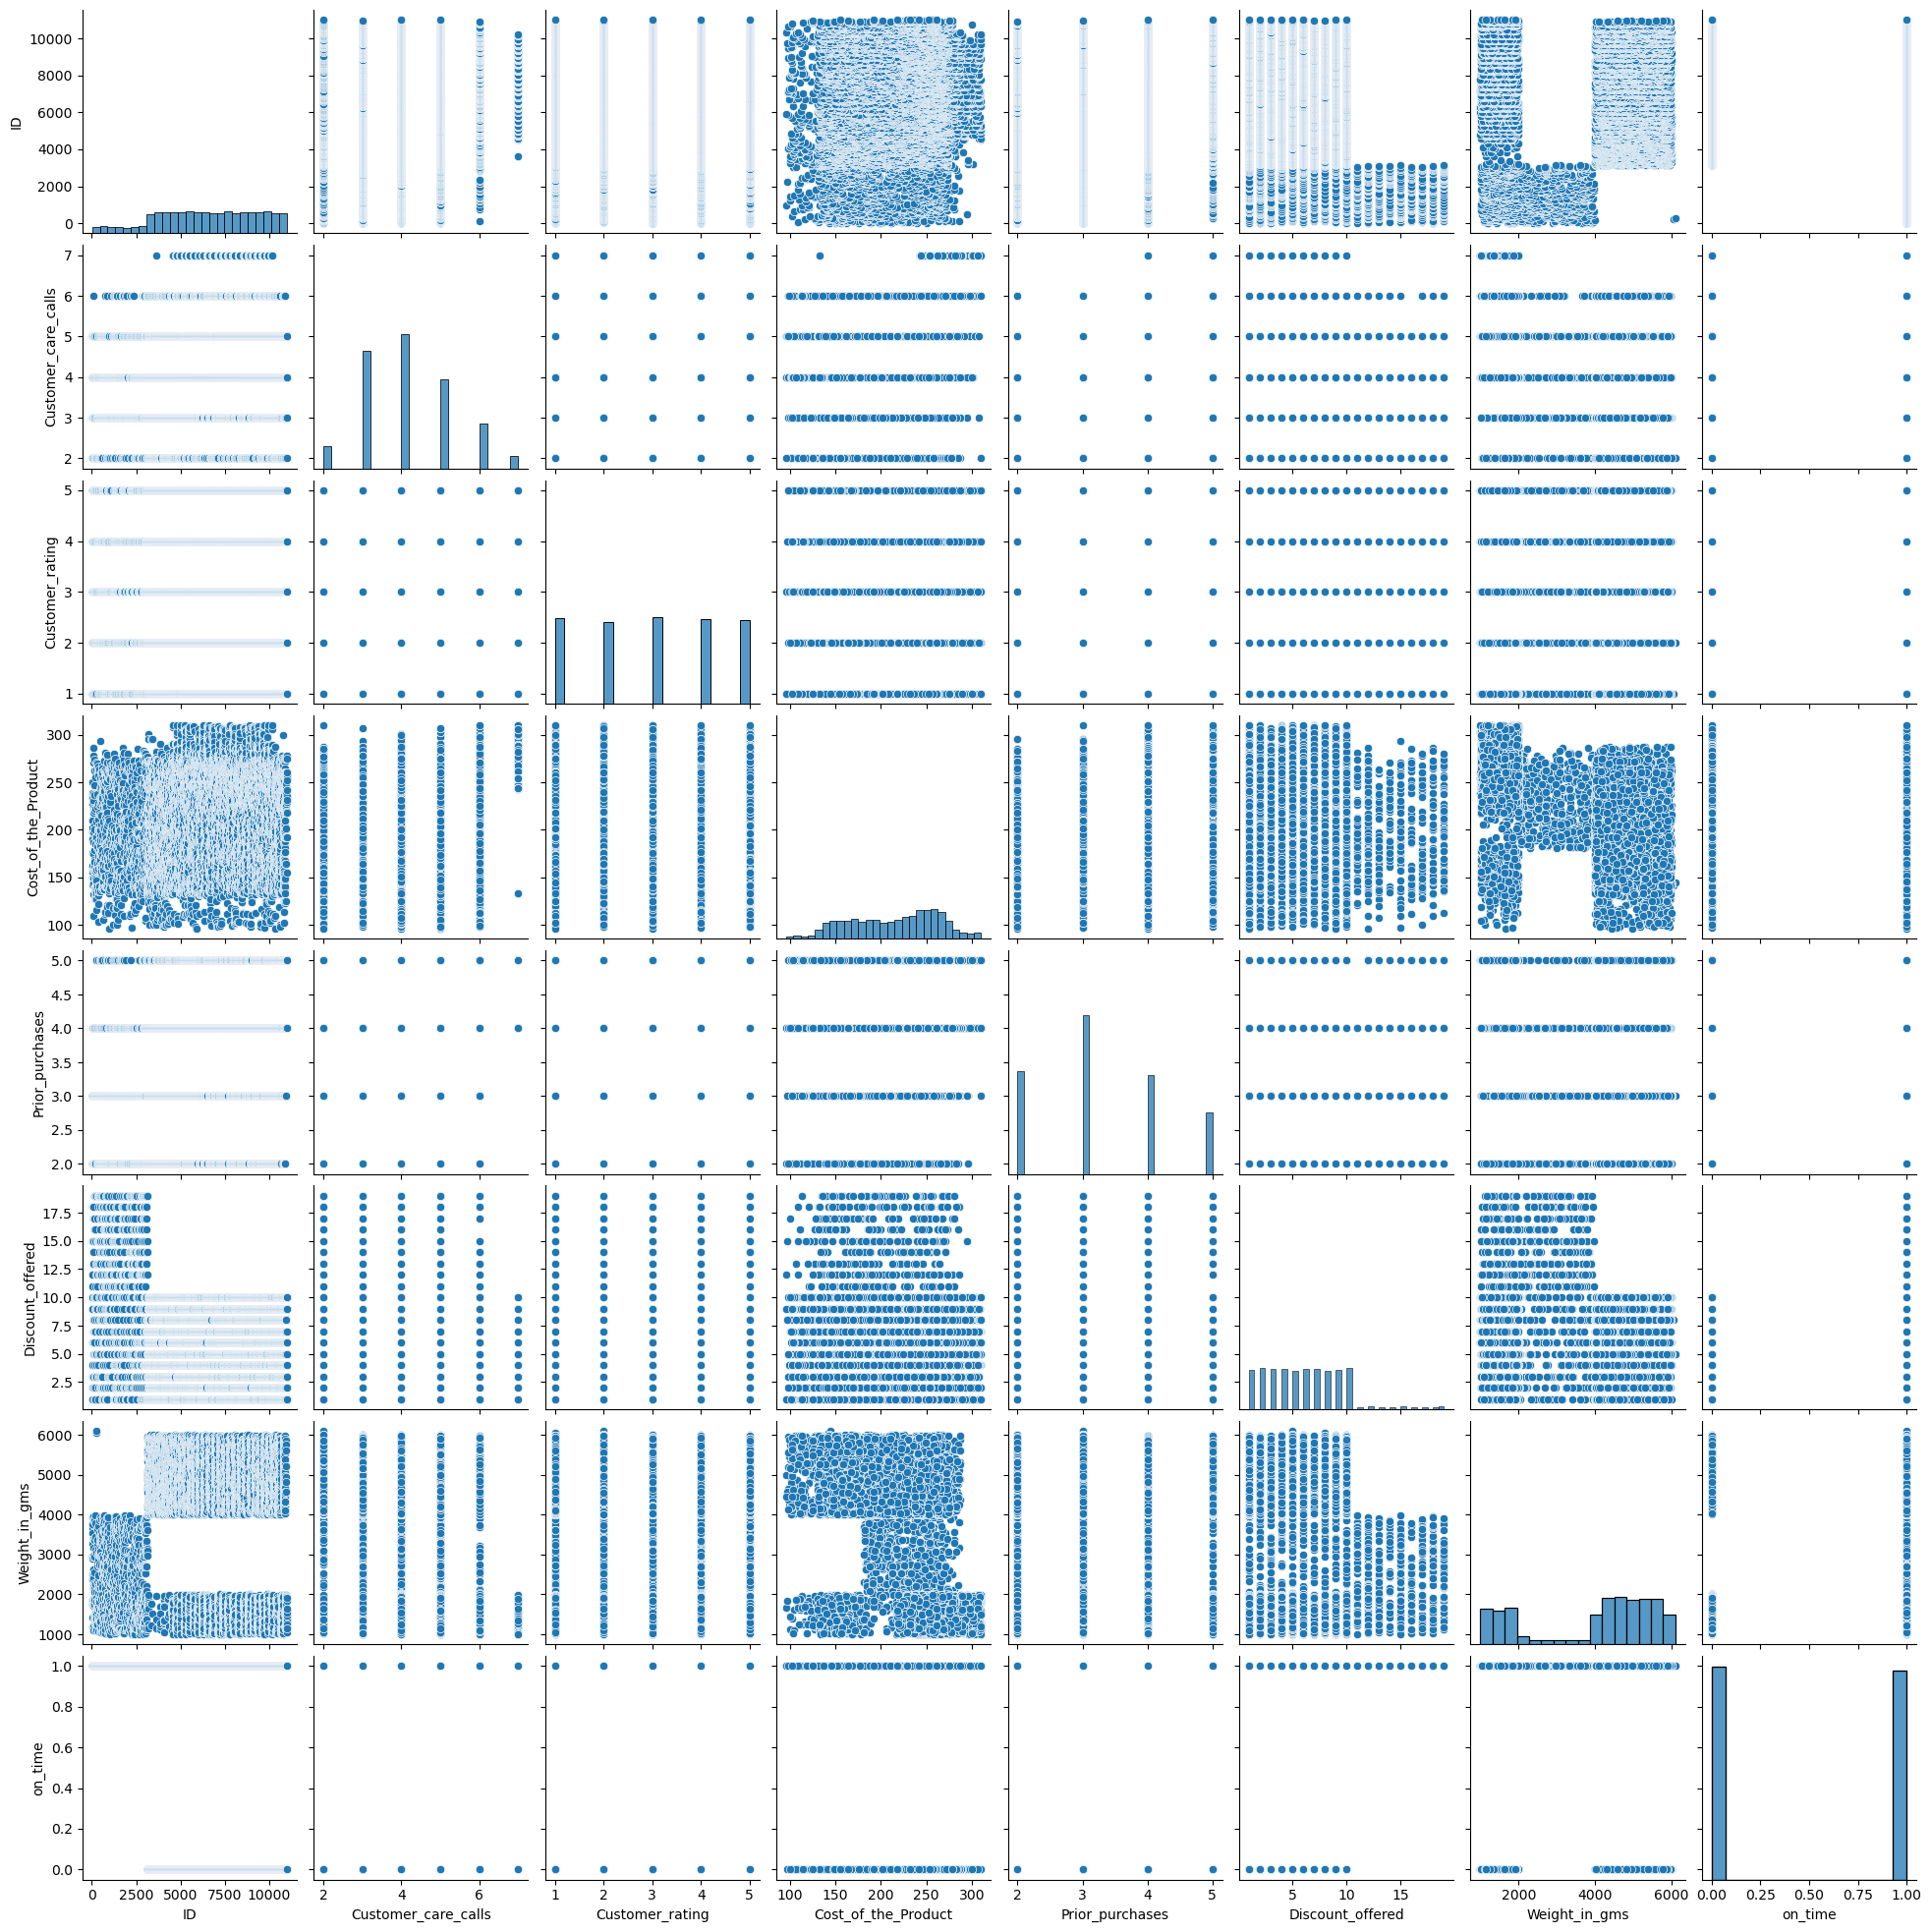

In [68]:
sns.pairplot(df[col_num])

<Axes: >

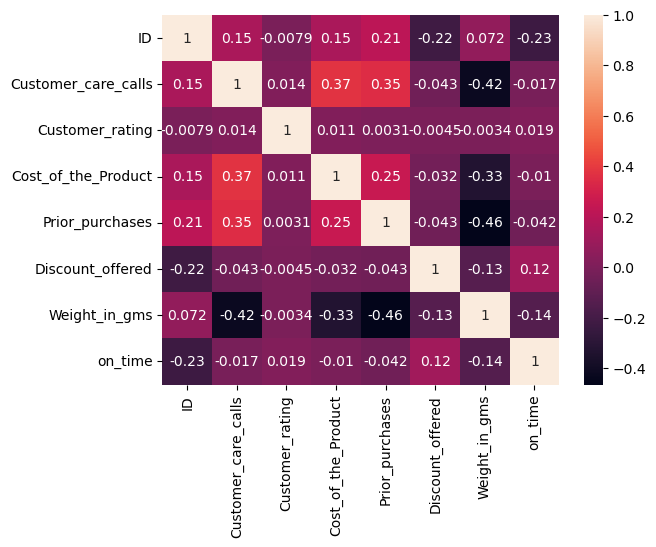

In [70]:
sns.heatmap(df[col_num].corr(), annot  = True)

#### Additional Data Preparation before Modeling

In [73]:
## feature engineering

In [75]:
df["cost_weight"] = df["Cost_of_the_Product"]/df["Weight_in_gms"]
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time,cost_weight
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.149533
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1,0.114326
6,7,D,Flight,3,4,250,3,low,F,3,2371,1,0.105441
8,9,A,Flight,3,4,150,3,low,F,11,1861,1,0.080602
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1,0.065443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0,0.123820
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,0.163849
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,0.186047
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,0.209524


In [77]:
## One Hot Encoding

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7971 entries, 3 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7971 non-null   int64  
 1   Warehouse_block      7971 non-null   object 
 2   Mode_of_Shipment     7971 non-null   object 
 3   Customer_care_calls  7971 non-null   int64  
 4   Customer_rating      7971 non-null   int64  
 5   Cost_of_the_Product  7971 non-null   int64  
 6   Prior_purchases      7971 non-null   int64  
 7   Product_importance   7971 non-null   object 
 8   Gender               7971 non-null   object 
 9   Discount_offered     7971 non-null   int64  
 10  Weight_in_gms        7971 non-null   int64  
 11  on_time              7971 non-null   int64  
 12  cost_weight          7971 non-null   float64
dtypes: float64(1), int64(8), object(4)
memory usage: 871.8+ KB


In [83]:
df = df.drop(columns = ["ID"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7971 entries, 3 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      7971 non-null   object 
 1   Mode_of_Shipment     7971 non-null   object 
 2   Customer_care_calls  7971 non-null   int64  
 3   Customer_rating      7971 non-null   int64  
 4   Cost_of_the_Product  7971 non-null   int64  
 5   Prior_purchases      7971 non-null   int64  
 6   Product_importance   7971 non-null   object 
 7   Gender               7971 non-null   object 
 8   Discount_offered     7971 non-null   int64  
 9   Weight_in_gms        7971 non-null   int64  
 10  on_time              7971 non-null   int64  
 11  cost_weight          7971 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 809.6+ KB


In [85]:
df = pd.get_dummies(df)
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,on_time,cost_weight,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
3,3,3,176,4,10,1177,1,0.149533,False,True,...,False,False,True,False,False,False,False,True,False,True
5,3,1,162,3,12,1417,1,0.114326,False,False,...,False,True,True,False,False,False,False,True,True,False
6,3,4,250,3,3,2371,1,0.105441,False,False,...,True,False,True,False,False,False,True,False,True,False
8,3,4,150,3,11,1861,1,0.080602,True,False,...,False,False,True,False,False,False,True,False,True,False
10,3,4,189,2,12,2888,1,0.065443,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,5,1,236,5,3,1906,0,0.123820,False,False,...,True,False,False,False,True,False,False,True,False,True
10994,4,1,252,5,1,1538,1,0.163849,True,False,...,False,False,False,False,True,False,False,True,True,False
10995,4,1,232,5,6,1247,0,0.186047,False,True,...,False,False,False,False,True,False,False,True,True,False
10996,5,4,242,5,4,1155,0,0.209524,False,False,...,False,False,False,False,True,False,True,False,True,False


In [87]:
## Train test split

In [89]:
X = df.drop(columns = ["on_time"])
y = df["on_time"]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5579, 20)
(2392, 20)
(5579,)
(2392,)


#### Modeling & Evaluation

In [96]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
params = {
    "max_depth": [2,3,5,7,10,20],
    "min_samples_leaf": [25,50,75,100,200]
}

In [102]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 5,
                           scoring = "roc_auc")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 7, 10, 20],
                         'min_samples_leaf': [25, 50, 75, 100, 200]},
             scoring='roc_auc')

In [106]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=200)

In [108]:
## Evaluation

In [112]:
from sklearn.metrics import precision_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rfbest = rf_best.predict(X_test)

In [118]:
print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rfbest, pos_label = 1, average = "binary"))

0.5407537248028046
0.597752808988764
0.6475524475524476


In [122]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rfbest, pos_label = 1, average = "binary"))

0.5233248515691263
0.45122985581000846
0.3927056827820187


In [124]:
# recall paling tinggil model 1, kasus ini penting precision krn mendetact yg tdk tepat waktu,diliar dri precision dn recall

In [126]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rfbest = rf_best.predict_proba(X_test)[:,1]

In [128]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rfbest))

0.5456690210030298
0.6016185975091722
0.6154712133957334


#### Business Conclusion

Business Impact

Final model = Random Forest with Hypermarameter Tuning

Precision = 65% (memprediksi yg terlambat), Recall = 39% (yg ontime)

Assume dari setiap 100 transaksi, 20 akan terlambat (not on time)
1. Before the model:
    - Kita tidak tahu transaksi yang akan terlambat, then kita berikan estimasi yang sama untuk semua transaksi.
    - Only 80 yang melakukan transaksi
    - Revenue: 80 * 100k = 8 mio
2. After the model:
   - Kita mengetahui transaksi yang kemungkinan akan terlambat and memberikan estimasi waktu yang lebih panjang.
   - Transaksi ulang: Precision * Late = 0.65 * 20 = 13
   - Revenue = (80+13) * 100K = 9.3 mio